In [24]:
%matplotlib inline

import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Etern\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Etern\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Etern\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
!pip install requests

import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

data = response.text

Defaulting to user installation because normal site-packages is not writeable


In [26]:
#installs textblob in case it is not installed
#!pip install -U textblob
#!python -m textblob.download_corpora

from pathlib import Path
from textblob import TextBlob

blob = TextBlob(data)
items = blob.word_counts.items()

In [27]:
from operator import itemgetter
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]

sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [28]:
import pandas as pd

top20 = sorted_items[0:21]

df = pd.DataFrame(top20, columns=['word','count'])

print(df)

      word  count
0      ham    337
1     lord    211
2     haue    175
3     king    173
4    shall    107
5   hamlet    106
6     come    106
7     thou    105
8      let    104
9     good     99
10     hor     95
11     thy     90
12     may     85
13   enter     85
14      oh     81
15    like     79
16    well     71
17    know     70
18   would     69
19   selfe     68
20    loue     65


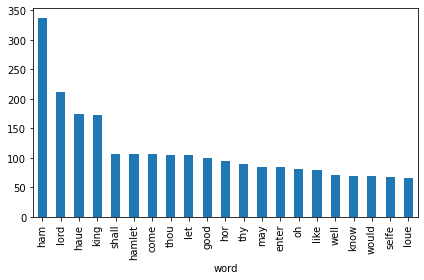

In [29]:
axes = df.plot.bar(x='word',y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout()

In [30]:
import imageio

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"

mask_image = imageio.imread(image_file)

In [31]:
#if wordcloud is not installed
#!pip install wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=1000, colormap='prism',mask=mask_image, background_color='white')

wordcloud.generate(data)

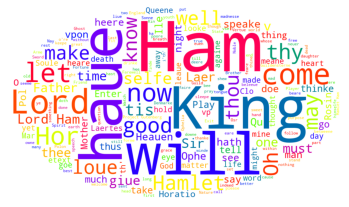

In [32]:
#shows the wordcloud
plt.axis('off')
plt.imshow(wordcloud)